<a href="https://colab.research.google.com/github/tuananh1006/Torch_Practice/blob/main/CNNTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Familar With Processing Image

In [1]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 92% 200M/218M [00:01<00:00, 160MB/s]
100% 218M/218M [00:01<00:00, 160MB/s]


In [2]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [3]:
#import transforms and compose
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

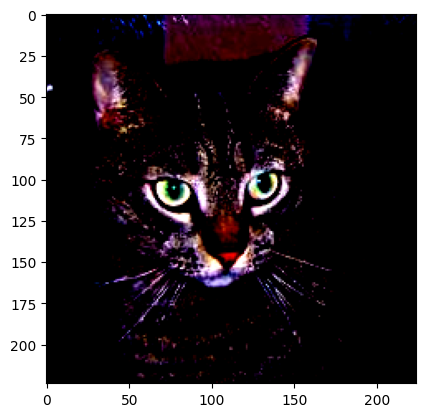

In [13]:
from PIL import Image
img=Image.open('./training_set/training_set/cats/cat.1.jpg')
import matplotlib.pyplot as plt
plt.imshow(x.permute(1,2,0))

In [23]:
preprocess_steps=transforms.Compose([
    transforms.Resize(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.CenterCrop(500),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )

])

In [24]:
x=preprocess_steps(img)

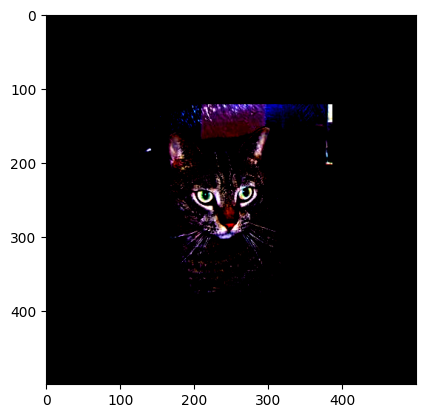

In [25]:
import matplotlib.pyplot as plt
plt.imshow(x.permute(1,2,0))

Started

In [26]:
import numpy as np

In [27]:
def imshow(img):
  img=img/2+0.5
  npimg=img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()

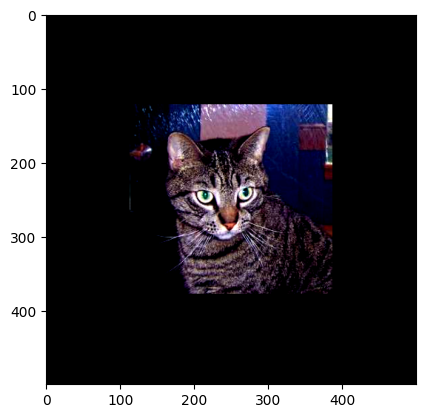

In [29]:
imshow(x)

In [43]:
transform=transforms.Compose(
    [ transforms.Resize(32),
      transforms.CenterCrop(32),
      transforms.Grayscale(num_output_channels=1),
      transforms.ToTensor(),
      transforms.Normalize((0.5),(0.5))]
)

In [44]:
import torchvision
trainset=torchvision.datasets.ImageFolder(root='./training_set/training_set',transform=transform)
testset=torchvision.datasets.ImageFolder(root='./test_set/test_set',transform=transform)

In [91]:
len(testset)

2023

In [92]:
from torch.utils.data import DataLoader
trainloader=DataLoader(trainset,batch_size=4,shuffle=True,num_workers=0)
testloader=DataLoader(testset,batch_size=2023,shuffle=False,num_workers=0)

In [71]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

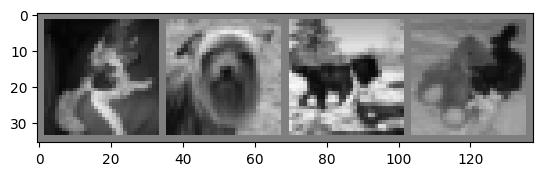

In [72]:
imshow(torchvision.utils.make_grid(images))

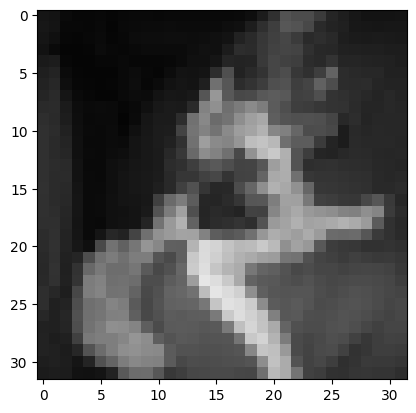

In [73]:
imshow(torchvision.utils.make_grid(images[0]))

In [74]:
images[0].shape

torch.Size([1, 32, 32])

In [79]:
import torch.nn as nn
import torch
import torch.nn.functional as F
class ImageClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(1,6,3) #6,30,30
    self.pool=nn.MaxPool2d(2,2) #6,15,15
    self.conv2=nn.Conv2d(6,16,3) #16,13,13
    self.fc1=nn.Linear(16*6*6,120) #
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,1)
    self.sigmoid=nn.Sigmoid()
  def forward(self,x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=torch.flatten(x,1)
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    x=self.sigmoid(x)
    return x

In [117]:
model=ImageClassifier()
loss_fn=nn.BCELoss()
#loss_fn=nn.BCEWithLogitsLoss()
losses=[]
#optimizer=torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.9)
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)
epochs=10

In [118]:
for epoch in range(epochs):
  for i,data in enumerate(trainloader,0):
    inputs,labels=data
    optimizer.zero_grad()
    outputs=model(inputs).squeeze(1)
    loss=loss_fn(outputs,labels.float())
    loss.backward()
    optimizer.step()
  losses.append(loss.item())
  print(f'epoch:{epoch+1},loss:{loss.item()}')

epoch:1,loss:0.44081276655197144
epoch:2,loss:1.2451391220092773
epoch:3,loss:0.4003165364265442
epoch:4,loss:0.17961466312408447
epoch:5,loss:0.6181771159172058
epoch:6,loss:0.10348105430603027
epoch:7,loss:0.01152239553630352
epoch:8,loss:0.000806695141363889
epoch:9,loss:0.0061170607805252075
epoch:10,loss:0.48091650009155273


<Axes: >

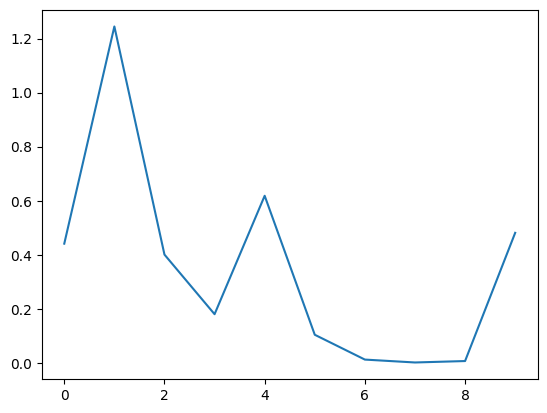

In [119]:
import seaborn as sns
sns.lineplot(x=range(epochs),y=losses)

In [120]:
from sklearn.metrics import accuracy_score
with torch.no_grad():
  for data in testloader:
    images,labels=data
    outputs=model(images).round().squeeze(1)
    print(accuracy_score(labels,outputs.numpy()))

0.7152743450321305


In [121]:
y_test=[]
y_test_pred=[]
with torch.no_grad():
  for data in testloader:
    images,labels=data
    outputs=model(images).round().squeeze(1)
    y_test.extend(labels.numpy())
    y_test_pred.extend(outputs.numpy())

In [122]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


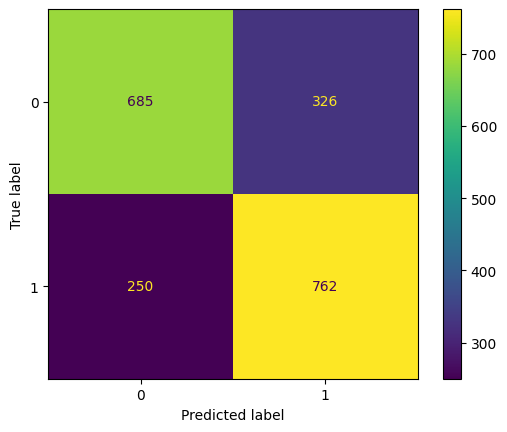

In [124]:
disp.plot()